In [206]:
import pandas as pd
import os

current_dir = os.getcwd()
data_path = os.path.join(current_dir, 'data', 'allrounder_df.csv')


allrounder_df = pd.read_csv(data_path)
allrounder_df

,name,country,role,bat_style,bowl_style,t20_no,t20_runs,t20_avg,t20_sr,t20_50,...,ipl_4s,ipl_6s,t20_wkts,t20_bowl_econ,t20_bowl_avg,t20_bowl_sr,ipl_wkts,ipl_bowl_econ,ipl_bowl_avg,ipl_bowl_sr
0,ravichandran ashwin,india,bowling-allrounder,right-handed-bat,right-arm-offbreak,12,184,26.29,115.00,0,...,61,28,72,6.91,23.22,20.17,180,7.12,29.83,25.13
1,rachin ravindra,new zealand,batting-allrounder,left-handed-bat,left-arm-orthodox,6,309,17.17,127.69,2,...,22,12,13,6.59,20.77,18.92,0,3.50,0.00,0.00
2,anshul kamboj,india,bowling-allrounder,right-handed-bat,right-arm-fast-medium,0,0,0.00,0.00,0,...,0,0,0,0.00,0.00,0.00,2,11.40,57.00,30.00
3,sam curran,england,bowling-allrounder,left-handed-bat,left-arm-fast-medium,9,356,14.24,124.48,1,...,74,37,54,8.41,27.07,19.31,58,9.65,32.76,20.36
4,vijay shankar,india,batting-allrounder,right-handed-bat,right-arm-medium,0,101,25.25,138.36,0,...,80,45,5,9.10,38.20,25.20,9,8.67,38.22,26.44
5,ashutosh sharma,india,batting-allrounder,right-handed-bat,right-arm-medium,0,0,0.00,0.00,0,...,10,15,0,0.00,0.00,0.00,0,0.00,0.00,0.00
6,darshan nalkande,india,bowling-allrounder,right-handed-bat,right-arm-fast-medium,0,0,0.00,0.00,0,...,0,1,0,0.00,0.00,0.00,6,10.57,24.67,14.00
7,washington sundar,india,bowling-allrounder,left-handed-bat,right-arm-offbreak,8,193,13.79,121.39,1,...,32,9,48,6.94,23.50,20.31,37,7.54,35.81,28.49
8,sherfane rutherford,west indies,batting-allrounder,left-handed-bat,right-arm-fast-medium,6,428,25.18,143.15,2,...,3,8,1,10.29,72.00,42.00,1,8.63,59.00,41.00
9,glenn phillips,new zealand,batting-allrounder,right-handed-bat,right-arm-offbreak,12,1928,31.10,140.53,10,...,3,6,6,7.36,26.17,21.33,2,8.00,20.00,15.00


In [207]:
import numpy as np

df = allrounder_df.copy()

# Economy classification
def classify_bowling_style(row):
    if row['ipl_bowl_econ'] <= 7.5 and row['ipl_bowl_econ'] > 0:
        return 'restrictive'
    if row['t20_bowl_econ'] <= 7.5 and row['t20_bowl_econ'] > 0:
        return 'restrictive'
    elif row['ipl_bowl_sr'] <= 16 and row['ipl_bowl_sr'] > 0 and row['ipl_bowl_avg'] <= 18 and row['ipl_bowl_avg'] > 0:
        return 'attacking'
    elif row['t20_bowl_sr'] <= 16 and row['t20_bowl_sr'] > 0 and row['t20_bowl_avg'] <= 18 and row['t20_bowl_avg'] > 0:
        return 'attacking'
    elif row['t20_wkts'] >= 50:
        return 'experienced'
    elif row['ipl_wkts'] >= 50:
        return 'experienced'
    else:
        return 'normal'

df['style'] = df.apply(classify_bowling_style, axis=1)

# One-hot encoding the role
df['is_restrictive'] = (df['style'] == 'restrictive').astype(int)
df['is_attacking'] = (df['style'] == 'attacking').astype(int)
df['is_experienced'] = (df['style'] == 'experienced').astype(int)

df = df.drop(columns=['style'])

In [208]:
df['ipl_matches'] = (df['ipl_runs'] / df['ipl_avg']).replace([np.inf, -np.inf], 0).fillna(0)
df['t20_matches'] = (df['t20_runs'] / df['t20_avg']).replace([np.inf, -np.inf], 0).fillna(0)

# IPL Level
df['ipl_boundary_runs'] = df['ipl_4s']*4 + df['ipl_6s']*6
df['ipl_boundary_percent'] = df['ipl_boundary_runs'] / df['ipl_runs']
df['ipl_50_rate'] = df['ipl_50'] / df['ipl_matches']
df['ipl_exp_score'] = df['ipl_runs'] / df['ipl_matches']

# T20 Level
df['t20_boundary_runs'] = df['t20_4s']*4 + df['t20_6s']*6
df['t20_boundary_percent'] = df['t20_boundary_runs'] / df['t20_runs']
df['t20_50_rate'] = df['t20_50'] / df['t20_matches']
df['t20_exp_score'] = df['t20_runs'] / df['t20_matches']


def classify_batting_style(row):
    if row['ipl_avg'] >= 30 and row['ipl_sr'] < 135 and row['ipl_50_rate'] >= 0.2:
        return 'anchor'
    elif row['t20_avg'] >= 30 and row['t20_sr'] < 135 and row['t20_50_rate'] >= 0.2:
        return 'anchor'
    elif row['ipl_sr'] >= 140 and row['ipl_boundary_percent'] >= 0.6:
        return 'aggressive'
    elif row['t20_sr'] >= 140 and row['t20_boundary_percent'] >= 0.6:
        return 'aggressive'
    else:
        return 'balanced'

df['position'] = df.apply(classify_batting_style, axis=1)

df['is_anchor'] = (df['position'] == 'anchor').astype(int)
df['is_aggressive'] = (df['position'] == 'aggressive').astype(int)
df['is_balanced'] = (df['position'] == 'balanced').astype(int)

df = df.drop(columns=['position'])

df['ipl_exp_score'] = df['ipl_exp_score'].replace([np.inf, -np.inf], 0)
df['t20_exp_score'] = df['t20_exp_score'].replace([np.inf, -np.inf], 0)


In [209]:
df

,name,country,role,bat_style,bowl_style,t20_no,t20_runs,t20_avg,t20_sr,t20_50,...,ipl_boundary_percent,ipl_50_rate,ipl_exp_score,t20_boundary_runs,t20_boundary_percent,t20_50_rate,t20_exp_score,is_anchor,is_aggressive,is_balanced
0,ravichandran ashwin,india,bowling-allrounder,right-handed-bat,right-arm-offbreak,12,184,26.29,115.00,0,...,0.515000,0.016663,13.33,92,0.500000,0.000000,26.29,0,0,1
1,rachin ravindra,new zealand,batting-allrounder,left-handed-bat,left-arm-orthodox,6,309,17.17,127.69,2,...,0.720721,0.100000,22.20,160,0.517799,0.111133,17.17,0,1,0
2,anshul kamboj,india,bowling-allrounder,right-handed-bat,right-arm-fast-medium,0,0,0.00,0.00,0,...,0.000000,NaN,0.00,0,NaN,NaN,NaN,0,0,1
3,sam curran,england,bowling-allrounder,left-handed-bat,left-arm-fast-medium,9,356,14.24,124.48,1,...,0.586636,0.142865,25.23,174,0.488764,0.040000,14.24,0,0,1
4,vijay shankar,india,batting-allrounder,right-handed-bat,right-arm-medium,0,101,25.25,138.36,0,...,0.529148,0.136359,25.34,74,0.732673,0.000000,25.25,0,0,1
5,ashutosh sharma,india,batting-allrounder,right-handed-bat,right-arm-medium,0,0,0.00,0.00,0,...,0.687831,0.142857,27.00,0,NaN,NaN,NaN,0,1,0
6,darshan nalkande,india,bowling-allrounder,right-handed-bat,right-arm-fast-medium,0,0,0.00,0.00,0,...,0.500000,0.000000,6.00,0,NaN,NaN,NaN,0,0,1
7,washington sundar,india,bowling-allrounder,left-handed-bat,right-arm-offbreak,8,193,13.79,121.39,1,...,0.481481,0.000000,14.00,118,0.611399,0.071451,13.79,0,0,1
8,sherfane rutherford,west indies,batting-allrounder,left-handed-bat,right-arm-fast-medium,6,428,25.18,143.15,2,...,0.566038,0.000000,15.14,278,0.649533,0.117664,25.18,0,1,0
9,glenn phillips,new zealand,batting-allrounder,right-handed-bat,right-arm-offbreak,12,1928,31.10,140.53,10,...,0.738462,0.000000,9.29,1098,0.569502,0.161307,31.10,0,0,1


In [210]:
df['overseas'] = (df['country'].str.lower() != 'india').astype(int)

In [211]:
df.columns

Index(['name', 'country', 'role', 'bat_style', 'bowl_style', 't20_no',
       't20_runs', 't20_avg', 't20_sr', 't20_50', 't20_4s', 't20_6s', 'ipl_no',
       'ipl_runs', 'ipl_avg', 'ipl_sr', 'ipl_50', 'ipl_4s', 'ipl_6s',
       't20_wkts', 't20_bowl_econ', 't20_bowl_avg', 't20_bowl_sr', 'ipl_wkts',
       'ipl_bowl_econ', 'ipl_bowl_avg', 'ipl_bowl_sr', 'is_restrictive',
       'is_attacking', 'is_experienced', 'ipl_matches', 't20_matches',
       'ipl_boundary_runs', 'ipl_boundary_percent', 'ipl_50_rate',
       'ipl_exp_score', 't20_boundary_runs', 't20_boundary_percent',
       't20_50_rate', 't20_exp_score', 'is_anchor', 'is_aggressive',
       'is_balanced', 'overseas'],
      dtype='object')

In [212]:
allrounder_graph = df[[
    'name', 'role', 'bowl_style', 'bat_style', 'is_restrictive', 'is_attacking',
    'is_experienced', 'overseas', 'ipl_exp_score', 't20_exp_score',
    'is_anchor', 'is_aggressive', 'is_balanced'
]]

In [213]:
allrounder_graph = allrounder_graph.fillna(0)

In [214]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_path = os.path.join(parent_dir, 'auction_data.csv')

auction = pd.read_csv(data_path)

In [215]:
auction = auction[['player', 'year', 'price']]
auction = auction[auction['year'] == 2025]

In [216]:
auction['player_lower'] = auction['player'].str.lower()
allrounder_graph = allrounder_graph.merge(
    auction[['player_lower', 'price']],
    left_on='name',
    right_on='player_lower',
    how='left'
)
allrounder_graph = allrounder_graph.drop(columns=['player_lower'])
allrounder_graph['price'] = allrounder_graph['price']/10000000

In [217]:
allrounder_graph = allrounder_graph[allrounder_graph['name'] != 'praveen dubey']
allrounder_graph

,name,role,bowl_style,bat_style,is_restrictive,is_attacking,is_experienced,overseas,ipl_exp_score,t20_exp_score,is_anchor,is_aggressive,is_balanced,price
0,ravichandran ashwin,bowling-allrounder,right-arm-offbreak,right-handed-bat,1,0,0,0,13.33,26.29,0,0,1,9.75
1,rachin ravindra,batting-allrounder,left-arm-orthodox,left-handed-bat,1,0,0,1,22.20,17.17,0,1,0,4.00
2,anshul kamboj,bowling-allrounder,right-arm-fast-medium,right-handed-bat,0,0,0,0,0.00,0.00,0,0,1,3.40
3,sam curran,bowling-allrounder,left-arm-fast-medium,left-handed-bat,0,0,1,1,25.23,14.24,0,0,1,2.40
4,vijay shankar,batting-allrounder,right-arm-medium,right-handed-bat,0,0,0,0,25.34,25.25,0,0,1,1.20
5,ashutosh sharma,batting-allrounder,right-arm-medium,right-handed-bat,0,0,0,0,27.00,0.00,0,1,0,3.80
6,darshan nalkande,bowling-allrounder,right-arm-fast-medium,right-handed-bat,0,0,0,0,6.00,0.00,0,0,1,0.30
7,washington sundar,bowling-allrounder,right-arm-offbreak,left-handed-bat,1,0,0,0,14.00,13.79,0,0,1,3.20
8,sherfane rutherford,batting-allrounder,right-arm-fast-medium,left-handed-bat,0,0,0,1,15.14,25.18,0,1,0,2.60
9,glenn phillips,batting-allrounder,right-arm-offbreak,right-handed-bat,1,0,0,1,9.29,31.10,0,0,1,2.00


In [218]:
drop_names = [
    'romario shepherd', 'swapnil singh', 'jacob bethell', 'raj bawa',
    'arjun tendulkar', 'rs hangargekar', 'arshin kulkarni', 'mahipal lomror',
    'darshan nalkande', 'ashutosh sharma', 'anshul kamboj', 'mohit rathee'
]
allrounder_graph = allrounder_graph[~allrounder_graph['name'].str.lower().isin([n.strip() for n in drop_names])]

In [219]:
allrounder_graph.to_csv('data/allrounder_graph.csv', index=False)

In [220]:
def compute_synergy(u, v):
    synergy = 0.0

    # Complementary bowling styles (e.g., left-arm vs right-arm, pace vs spin)
    if u['bowl_style'] != v['bowl_style']:
        synergy += 0.5
    else:
        synergy -= 0.2

    if u['role'] != v['role']:
        synergy += 0.3

    # Restrictive + attacking combo is good
    if (u['is_restrictive'] == 1 and v['is_attacking'] == 1) or (u['is_attacking'] == 1 and v['is_restrictive'] == 1):
        synergy += 1
    elif (u['is_restrictive'] == 1 and v['is_restrictive'] == 1) or (u['is_attacking'] == 1 and v['is_attacking'] == 1):
        synergy += 0.2

    # Experienced + inexperienced combo is good for balance
    if (u['is_experienced'] == 1 and v['is_experienced'] == 0) or (u['is_experienced'] == 0 and v['is_experienced'] == 1):
        synergy += 0.4
    elif u['is_experienced'] == 1 and v['is_experienced'] == 1:
        synergy += 0.2
    else:
        synergy -= 0.1

    # Use ipl_exp_score and t20_exp_score
    ipl_avg = (u.get('ipl_exp_score', 0) + v.get('ipl_exp_score', 0)) / 2
    t20_avg = (u.get('t20_exp_score', 0) + v.get('t20_exp_score', 0)) / 2

    if ipl_avg > 30:
        synergy += 0.5
    elif ipl_avg < 15:
        synergy -= 0.2

    if t20_avg > 30:
        synergy += 0.5
    elif t20_avg < 15:
        synergy -= 0.2

    # Complementary styles
    if u['is_anchor'] and v['is_aggressive'] or v['is_anchor'] and u['is_aggressive']:
        synergy += 0.8
    elif u['is_balanced'] or v['is_balanced']:
        synergy += 0.4


    # Batting style
    if u['bat_style'] == v['bat_style']:
        synergy -= 0.4

    # Overseas synergy adjustment
    if u['overseas'] == 1 and v['overseas'] == 1:
        synergy -= 0.1
    # elif u['overseas'] == 0 and v['overseas'] == 0:
    #     synergy += 0.2

    return synergy

In [221]:
import networkx as nx
import pandas as pd

df = bowler_graph

G = nx.Graph()

# Add players as nodes
for idx, row in df.iterrows():
    G.add_node(row['name'], **row.to_dict())

# Add synergy edges
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        u = df.iloc[i]
        v = df.iloc[j]
        synergy = compute_synergy(u, v)
        if synergy > 0:  # Only keep meaningful synergy edges
            G.add_edge(u['name'], v['name'], weight=synergy)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_36436\2983942470.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.


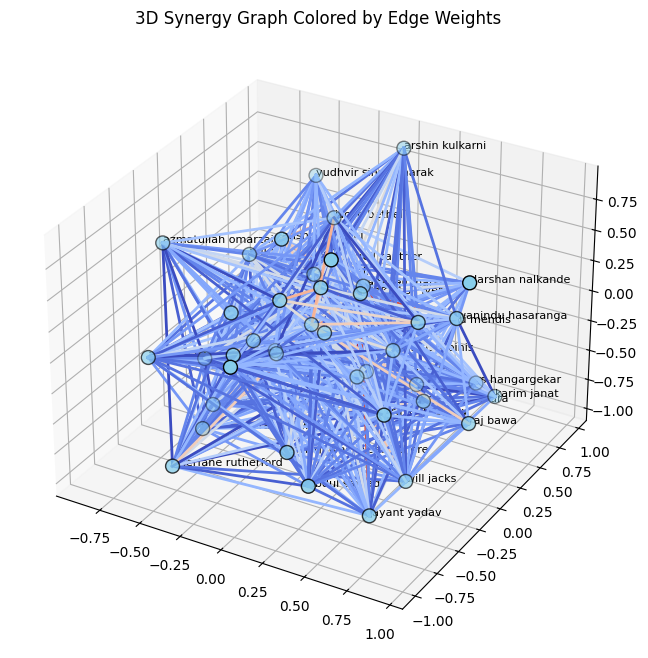

In [222]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# 3D layout (spring layout in 3D)
def spring_layout_3d(G, dim=3, seed=42):
    import random
    random.seed(seed)
    pos_2d = nx.spring_layout(G, dim=2, seed=seed)
    pos_3d = {}
    for node in G.nodes():
        pos_3d[node] = np.append(pos_2d[node], np.random.uniform(-1, 1))  # Add Z
    return pos_3d

# Generate 3D positions
pos_3d = spring_layout_3d(G)

# Extract edge weights and normalize them
edge_weights = nx.get_edge_attributes(G, 'weight')
weights = list(edge_weights.values())
norm = colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.
edge_colors = [cmap(norm(w)) for w in weights]

# Map edge to its color
edge_color_map = {edge: color for edge, color in zip(edge_weights, edge_colors)}

# Start plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges with colors based on weight
for i, (u, v) in enumerate(G.edges()):
    x = [pos_3d[u][0], pos_3d[v][0]]
    y = [pos_3d[u][1], pos_3d[v][1]]
    z = [pos_3d[u][2], pos_3d[v][2]]
    w = G[u][v]['weight']
    ax.plot(x, y, z, c=cmap(norm(w)), linewidth=2)

# Draw nodes
xs, ys, zs = zip(*[pos_3d[node] for node in G.nodes()])
ax.scatter(xs, ys, zs, s=100, c='skyblue', edgecolors='black')

# Add node labels
for node in G.nodes():
    x, y, z = pos_3d[node]
    ax.text(x, y, z, node, size=8, zorder=1)

ax.set_title("3D Synergy Graph Colored by Edge Weights")
plt.show()

In [223]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpBinary
import networkx as nx

def optimize_team(df, G, limits, budget, no_overseas=False):
    # Filter out overseas players if no_overseas is True
    if no_overseas:
        df = df[df['overseas'] == 0].copy()

    player_names = df['name'].tolist()
    x = {name: LpVariable(f"x_{name}", cat=LpBinary) for name in player_names}

    prob = LpProblem("Maximize_Synergy", LpMaximize)

    # Create auxiliary variables for edge synergy
    y = {}
    for u, v, data in G.edges(data=True):
        if u in x and v in x:
            var_name = f"y_{u}_{v}"
            y[(u, v)] = LpVariable(var_name, cat=LpBinary)
            # Constraints for AND logic
            prob += y[(u, v)] <= x[u]
            prob += y[(u, v)] <= x[v]
            prob += y[(u, v)] >= x[u] + x[v] - 1

    # Objective: Maximize synergy
    prob += lpSum([y[(u, v)] * data['weight'] for (u, v), data in G.edges.items() if (u, v) in y])

    # Position & overseas constraints
    for cat in ['batting-allrounder', 'bowling-allrounder']:
        cat_players = df[df['role'] == cat]
        player_names_in_cat = cat_players['name']
        prob += lpSum([x[name] for name in player_names_in_cat]) == limits[cat]

        # Overseas limit per category (only if no_overseas is False)
        if not no_overseas:
            overseas_players = cat_players[cat_players['overseas'] == 1]['name']
            prob += lpSum([x[name] for name in overseas_players]) <= 1
            
    # Total player count
    prob += lpSum(x[name] for name in player_names) == sum(limits.values())

    # Budget constraint
    prob += lpSum([x[name] * df[df['name'] == name]['price'].values[0] for name in player_names]) <= budget


    prob.solve()
    # Return selected team
    return [name for name in player_names if x[name].varValue == 1]

In [224]:
# Option to specify players to remove before optimization
players_to_remove = []

# Remove specified players from bowler_graph
filtered_allrounder_graph = allrounder_graph[~allrounder_graph['name'].isin(players_to_remove)].copy()

limits = {
    'batting-allrounder': 2,
    'bowling-allrounder': 2
}
budget = 30

best_team = optimize_team(filtered_allrounder_graph, G, limits, budget, False)
print("Optimized Team:", best_team)

selected_rows = filtered_allrounder_graph[filtered_allrounder_graph['name'].isin(best_team)].sort_values('role', ascending=True)
total_cost = selected_rows['price'].sum()
print("Total Cost:", total_cost)
selected_rows

Optimized Team: ['sam curran', 'glenn phillips', 'jayant yadav', 'venkatesh iyer']
Total Cost: 28.9


,name,role,bowl_style,bat_style,is_restrictive,is_attacking,is_experienced,overseas,ipl_exp_score,t20_exp_score,is_anchor,is_aggressive,is_balanced,price
9,glenn phillips,batting-allrounder,right-arm-offbreak,right-handed-bat,1,0,0,1,9.29,31.10,0,0,1,2.00
15,venkatesh iyer,batting-allrounder,right-arm-medium,left-handed-bat,0,1,0,0,31.57,33.25,0,1,0,23.75
3,sam curran,bowling-allrounder,left-arm-fast-medium,left-handed-bat,0,0,1,1,25.23,14.24,0,0,1,2.40
14,jayant yadav,bowling-allrounder,right-arm-offbreak,right-handed-bat,1,0,0,0,10.00,0.00,0,0,1,0.75
